In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [152]:
train_data = pd.read_csv('training_data.txt', sep=" ", header=None)
train_data.columns = ["a", "b", "label"]
test_data = pd.read_csv('testing_data.txt', sep=" ", header=None)
test_data.columns = ["a", "b", "label"]

X_train = np.array(train_data[['a','b']])
y_train = np.array(train_data['label'])

X_test = np.array(test_data[['a','b']])
y_test = np.array(test_data['label'])

test_data

,a,b,label
0,5.32,0.37,1
1,-4.06,-6.25,1
2,-1.17,-6.83,1
3,7.60,-4.52,1
4,-1.72,-4.08,1
5,2.58,1.60,1
6,2.00,-4.68,1
7,-4.31,-4.93,1
8,-3.45,-7.12,1
9,9.20,-6.23,1


In [153]:
class Perceptron:
    # initialize learning rate, number of iterations and the activation function
    def __init__(self, learning_rate=0.02, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # print(X.shape)
        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        # we make sure y consists of only class 1 and -1
        y_ = []
        for i in y:
            if i > 0:
                y_.append(1)
            else:
                y_.append(-1)

        for _ in range(self.n_iters):
            # first we apply linear function which is:- 
            # w*transpose(x) * bias then we use the unit step function
            for index, x_i in enumerate(X):
                # print(x_i)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[index] - y_predicted)

                self.weights += update * x_i
                #print("weights: ", self.weights)
                self.bias += update
                #print(self.bias)


                
    
    def accuracy(self, y_true, y_pred):            
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def predict(self, X):
        #print(x)
        #print(self.weights)
        #print(self.bias)
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    
#     def sigmoid(self,X):
#         return 1/(1+np.exp(-X))
    
    def _unit_step_func(self, x):
#       print(np.where(x>=1, 1, -1))
        return np.where(x>=1, 1, -1)

In [154]:
p = Perceptron(learning_rate = 0.01, n_iters = 10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

obj = []
for i in range(len(X_test)):
    obj.append(X_test[i])

# print(obj)
    
for i in range(len(predictions)):
    print(obj[i], "Actual label", y_test[i], "Predicted label: ", predictions[i])

accuracy = p.accuracy(y_test, predictions)
print("Accuracy: ", accuracy*100, '%')
print("Learned weights are: ", p.weights)
print("Learned bias: ", p.bias)

[5.32 0.37] Actual label 1 Predicted label:  1
[-4.06 -6.25] Actual label 1 Predicted label:  1
[-1.17 -6.83] Actual label 1 Predicted label:  1
[ 7.6  -4.52] Actual label 1 Predicted label:  1
[-1.72 -4.08] Actual label 1 Predicted label:  1
[2.58 1.6 ] Actual label 1 Predicted label:  1
[ 2.   -4.68] Actual label 1 Predicted label:  1
[-4.31 -4.93] Actual label 1 Predicted label:  1
[-3.45 -7.12] Actual label 1 Predicted label:  1
[ 9.2  -6.23] Actual label 1 Predicted label:  1
[-5.56  7.41] Actual label -1 Predicted label:  -1
[-5.87  8.37] Actual label -1 Predicted label:  -1
[-0.23  2.23] Actual label -1 Predicted label:  -1
[-8.39  4.77] Actual label -1 Predicted label:  -1
[-6.69  9.28] Actual label -1 Predicted label:  -1
[-9.51 -5.91] Actual label -1 Predicted label:  -1
[4.   5.59] Actual label -1 Predicted label:  -1
[-9.54  1.55] Actual label -1 Predicted label:  -1
[-9.97  0.31] Actual label -1 Predicted label:  -1
[2.8  9.71] Actual label -1 Predicted label:  -1
Accuracy

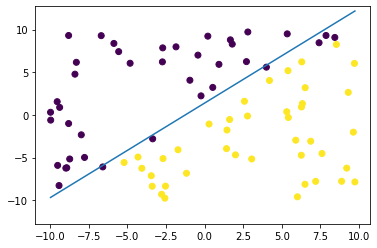

In [155]:
# training data set and learned hyperplane

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
# print(x0_1)
x0_2 = np.amax(X_train[:,0])
# print(x0_2)
# print(p.weights)
x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
# print(x1_1)
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]
# print(x1_2)

ax.plot([x0_1, x0_2], [x1_1, x1_2])

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()


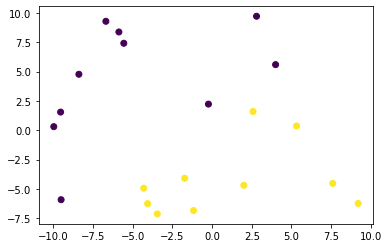

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_test[:,0], X_test[:,1],marker='o',c=y_test)

plt.show()

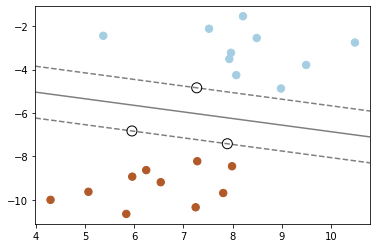

In [157]:
# Testing data set scatter plot and learned hyperplane

X, y = make_blobs(n_samples=len(y_test), centers=2, random_state=6)
#p.fit(X,y)
p.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=55, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [158]:
# Real dataset
train_data = pd.read_csv('BankNoteAuthentication.csv')
train_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [159]:
test_data = train_data.sample(frac =.25) 
test_data.count()
test_data

,variance,skewness,curtosis,entropy,class
507,4.60140,5.626400,-2.12350,0.19309,0
310,4.02150,-2.700400,2.49570,0.36636,0
978,0.75896,0.291760,-1.65060,0.83834,1
179,2.39250,9.798000,-3.03610,-2.82240,0
245,4.21340,-2.806000,2.01160,0.67412,0
...,...,...,...,...,...
1175,-1.75490,-0.080711,-0.75774,-0.37070,1
395,1.26160,4.430300,-1.33350,-1.75170,0
759,0.01727,8.693000,1.39890,-3.96680,0
749,0.88298,0.660090,6.00960,-0.43277,0


In [160]:
class Perceptron:

    def __init__(self, learning_rate=0.02, n_iters=25):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = []
        for i in y:
            if i > 0:
                y_.append(1)
            else:
                y_.append(0)
        #print(y_)
        

        for _ in range(self.n_iters):
            
            for index, x_i in enumerate(X):
                # print(x_i)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[index] - y_predicted)

                self.weights += update * x_i
                #print("weights: ", self.weights)
                self.bias += update
                #print(self.bias)
                
    
    def accuracy(self, y_true, y_pred):            
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def predict(self, X):
        #print(x)
        #print(self.weights)
        #print(self.bias)
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
#       print(np.where(x>=1, 1, -1))
        return np.where(x>=1, 1, 0)

In [163]:
X_train = np.array(train_data[['variance', 'skewness', 'curtosis', 'entropy']])
y_train = np.array(train_data['class'])

X_test = np.array(test_data[['variance', 'skewness', 'curtosis', 'entropy']])
y_test = np.array(test_data['class'])

p = Perceptron(learning_rate = 0.05, n_iters = 25)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

obj = []
for i in range(len(X_test)):
    obj.append(X_test[i])

# print(obj)
    
for i in range(len(predictions)):
    print(obj[i], "Actual label", y_test[i], "Predicted label: ", predictions[i])

accuracy = p.accuracy(y_test, predictions)
print("Accuracy: ", accuracy*100, '%')
print("Learned weights are: ", p.weights)
print("Learned bias: ", p.bias)

[ 4.6014   5.6264  -2.1235   0.19309] Actual label 0 Predicted label:  0
[ 4.0215  -2.7004   2.4957   0.36636] Actual label 0 Predicted label:  0
[ 0.75896  0.29176 -1.6506   0.83834] Actual label 1 Predicted label:  1
[ 2.3925  9.798  -3.0361 -2.8224] Actual label 0 Predicted label:  0
[ 4.2134  -2.806    2.0116   0.67412] Actual label 0 Predicted label:  0
[-2.5346e+00 -7.7392e-01  3.3602e+00  1.7100e-03] Actual label 1 Predicted label:  1
[3.7791 2.5762 1.3098 0.5655] Actual label 0 Predicted label:  0
[-1.3414  -1.9162  -0.15538 -0.11984] Actual label 1 Predicted label:  1
[ 3.9529  -2.3548   2.3792   0.48274] Actual label 0 Predicted label:  0
[1.6472  0.48213 4.7449  1.225  ] Actual label 0 Predicted label:  0
[-0.2062  9.2207 -3.7044 -6.8103] Actual label 0 Predicted label:  0
[-1.0833  -0.31247  1.2815   0.41291] Actual label 1 Predicted label:  1
[ 5.7403  -0.44284  0.38015  1.3763 ] Actual label 0 Predicted label:  0
[-1.786  -8.1157  7.0858 -1.2112] Actual label 1 Predicted 